In this notebook we will develop a simple ARIMA model to predict and forecast the price of the commodity Gold. 

## 1. Introduction to Time-Series Analysis

- A time-series data is a series of data points or observations recorded at different or regular time intervals. In general, a time series is a sequence of data points taken at equally spaced time intervals. The frequency of recorded data points may be hourly, daily, weekly, monthly, quarterly or annually.

- Time-Series Forecasting is the process of using a statistical model to predict future values of a time-series based on past results.

- A time series analysis encompasses statistical methods for analyzing time series data. These methods enable us to extract meaningful statistics, patterns and other characteristics of the data. Time series are visualized with the help of line charts. So, time series analysis involves understanding inherent aspects of the time series data so that we can create meaningful and accurate forecasts.

- Applications of time series are used in statistics, finance and business applications

### Components of a Time-Series
Trend - The trend shows a general direction of the time series data over a long period of time. A trend can be increasing(upward), decreasing(downward), or horizontal(stationary).

Seasonality - The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions.

Cyclical Component - These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series.

Irregular Variation - These are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random.

ETS Decomposition - ETS Decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend and Seasonality.

## 2. Time Series Terminology
There are various terms and concepts in time series that we should know. These are as follows:-

1. Dependence - It refers to the association of two observations of the same variable at prior time periods.

2. Stationarity - It shows the mean value of the series that remains constant over the time period. If past effects accumulate and the values increase towards infinity then stationarity is not met.

3. Differencing - Differencing is used to make the series stationary and to control the auto-correlations. There may be some cases in time series analyses where we do not require differencing and over-differenced series can produce wrong estimates.

4. Specification - It may involve the testing of the linear or non-linear relationships of dependent variables by using time series models such as ARIMA models.

5. Exponential Smoothing - Exponential smoothing in time series analysis predicts the one next period value based on the past and current value. It involves averaging of data such that the non-systematic components of each individual case or observation cancel out each other. The exponential smoothing method is used to predict the short term prediction.

6. Curve fitting - Curve fitting regression in time series analysis is used when data is in a non-linear relationship.

7. ARIMA - ARIMA stands for Auto Regressive Integrated Moving Average.

## 3. Time Series Analysis

### 3.1 Imports

In [8]:
#Data Importing
import opendatasets as od
import os
import datetime

# Data wrangling
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib as plt
import matplotlib.pyplot as plt
from pylab import rcParams

#Statistics 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from dateutil.parser import parse
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import acf


# Remove warnings
import warnings
warnings.filterwarnings('ignore')

### 3.2 Importing and Reading Data

In [10]:
dataset_url='https://www.kaggle.com/datasets/arashnic/learn-time-series-forecasting-from-gold-price?datasetId=984101&sortBy=voteCount'

In [11]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: austendeven
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 48.6k/48.6k [00:00<00:00, 1.19MB/s]

In [12]:
data_dir = './learn-time-series-forecasting-from-gold-price'

In [13]:
os.listdir(data_dir)

['gold_price_data.csv']

In [14]:
gold_df = pd.read_csv('./learn-time-series-forecasting-from-gold-price/gold_price_data.csv')

In [15]:
gold_df.head()

,Date,Value
0,1970-01-01,35.2
1,1970-04-01,35.1
2,1970-07-01,35.4
3,1970-10-01,36.2
4,1971-01-01,37.4


## 4. Data Understanding

In [18]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10787 entries, 0 to 10786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10787 non-null  object 
 1   Value   10787 non-null  float64
dtypes: float64(1), object(1)
memory usage: 168.7+ KB


- As we can the Date in gold_df is of the type object. We should convert it into datetime type and also to make the date column our index. 

In [19]:
gold_df.reset_index()

,index,Date,Value
0,0,1970-01-01,35.20
1,1,1970-04-01,35.10
2,2,1970-07-01,35.40
3,3,1970-10-01,36.20
4,4,1971-01-01,37.40
...,...,...,...
10782,10782,2020-03-09,1672.50
10783,10783,2020-03-10,1655.70
10784,10784,2020-03-11,1653.75
10785,10785,2020-03-12,1570.70


In [20]:
gold_df['Date'] = pd.to_datetime(gold_df['Date'], errors='coerce')
# Coerce will ignore all non-numeric values and replace all non-numeric values with NaN

In [21]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10787 entries, 0 to 10786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10787 non-null  datetime64[ns]
 1   Value   10787 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 168.7 KB


In [22]:
gold_df=gold_df.set_index('Date',drop=True) 
#drop=True means the current index will be inserted into the DataFrame as a column by default while preserving row order

In [25]:
gold_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Value,10787.0,653.596634,434.030848,35.1,349.2,409.35,1061.625,1895.0


## 5. Visualizations

### 5.1 Time Resampling

- Resampling is the indispensable tool of modern statistical analysis which involves repeatedly drawing samples from training data and refitting to a model of interest on each sample in order to obtain additional information about the fitted model.

<AxesSubplot:xlabel='Date'>

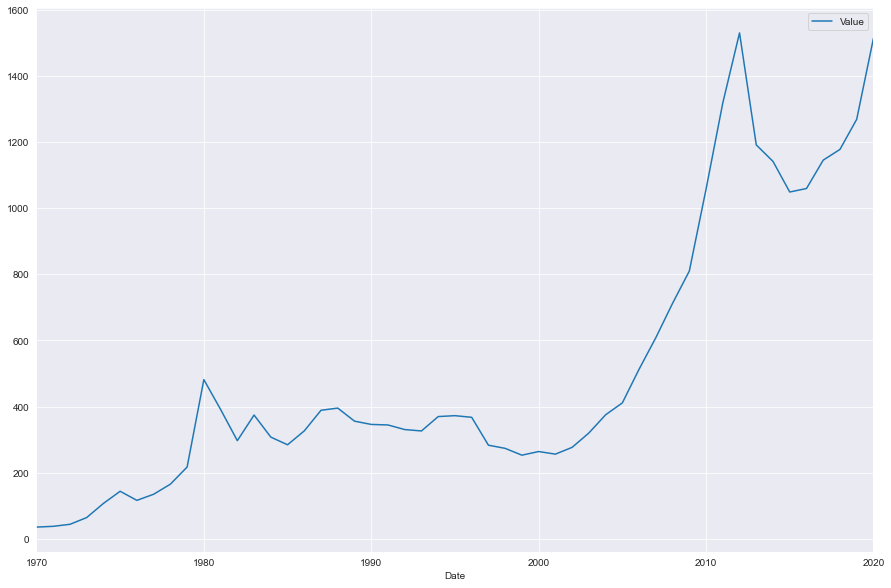

In [27]:
# Smallest price value throughout the calender year

gold_df.resample(rule='A').min().plot(figsize=(15,10))

<AxesSubplot:xlabel='Date'>

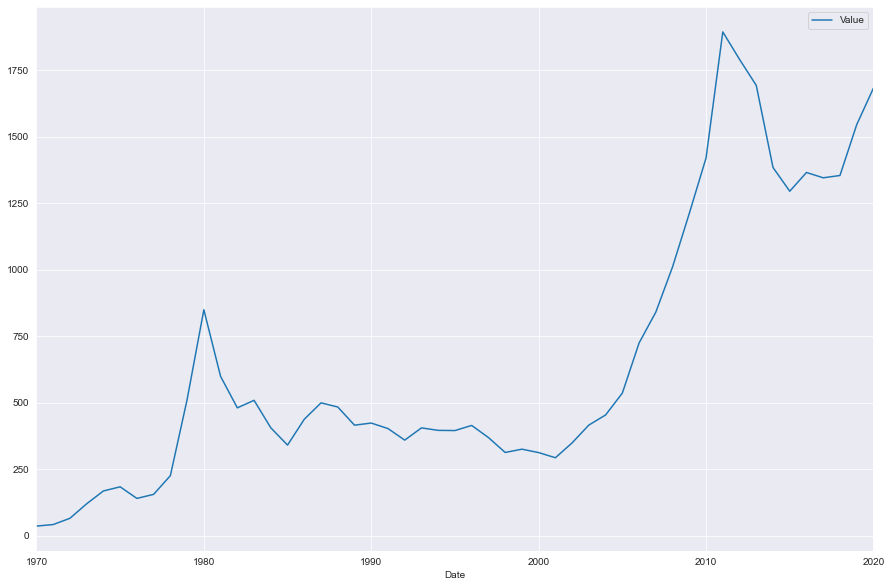

In [28]:
# Largest price value per year

gold_df.resample(rule='A').max().plot(figsize=(15,10))

<AxesSubplot:xlabel='Date'>

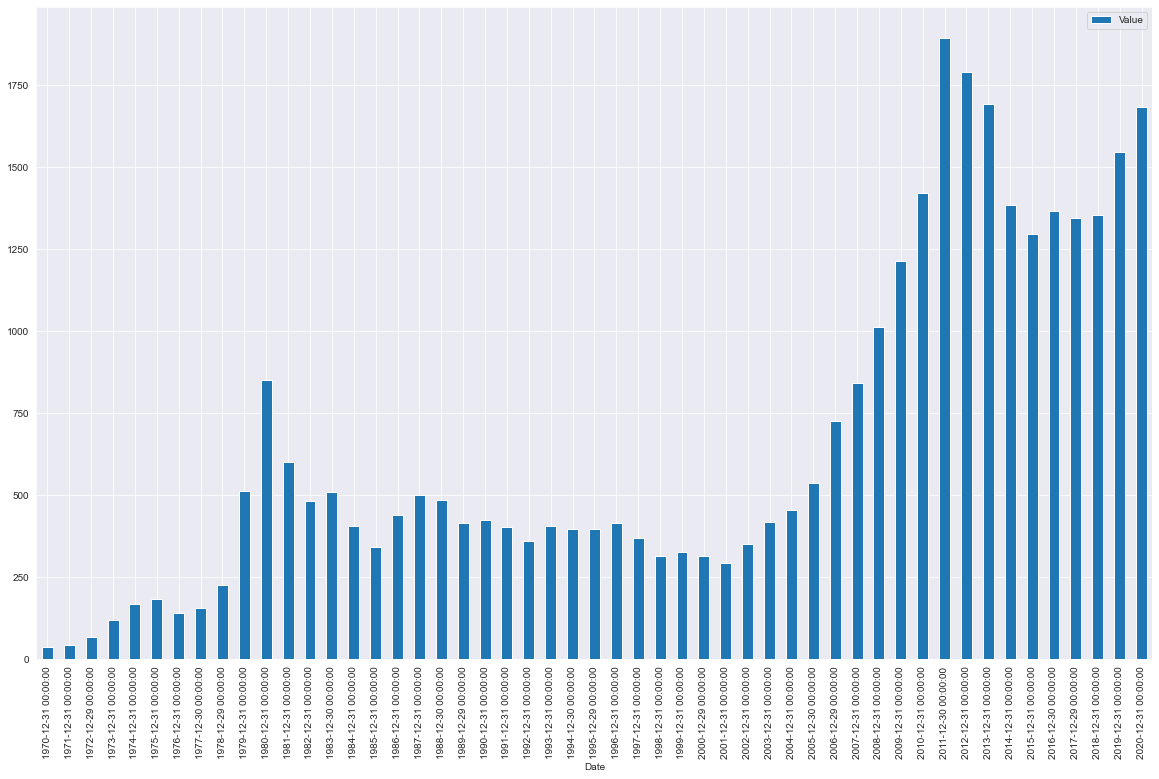

In [30]:
# Highest price each year in Bar Graph

gold_df.resample(rule='BA').max().plot(figsize=(20,12),kind='bar')

### 5.2 Visualizations

<AxesSubplot:title={'center':'Gold Price USD'}, xlabel='Year', ylabel='Price in USD'>

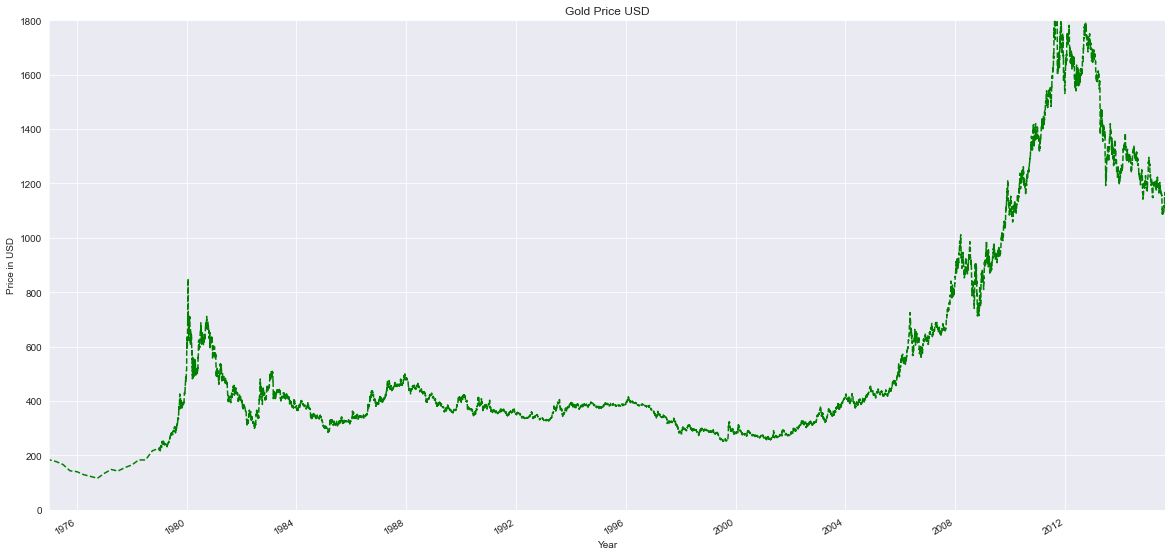

In [31]:
# x limit and y limit between Jan 1st 1975 and September 1st, 2015

gold_df['Value'].plot(xlim=['1975-01-01','2015-09-01'],
                      ylim=[0,1800],
                      c='green',
                      ls='--',
                      figsize=(20,10), 
                      ylabel = "Price in USD", 
                      xlabel="Year",  
                      title="Gold Price USD")

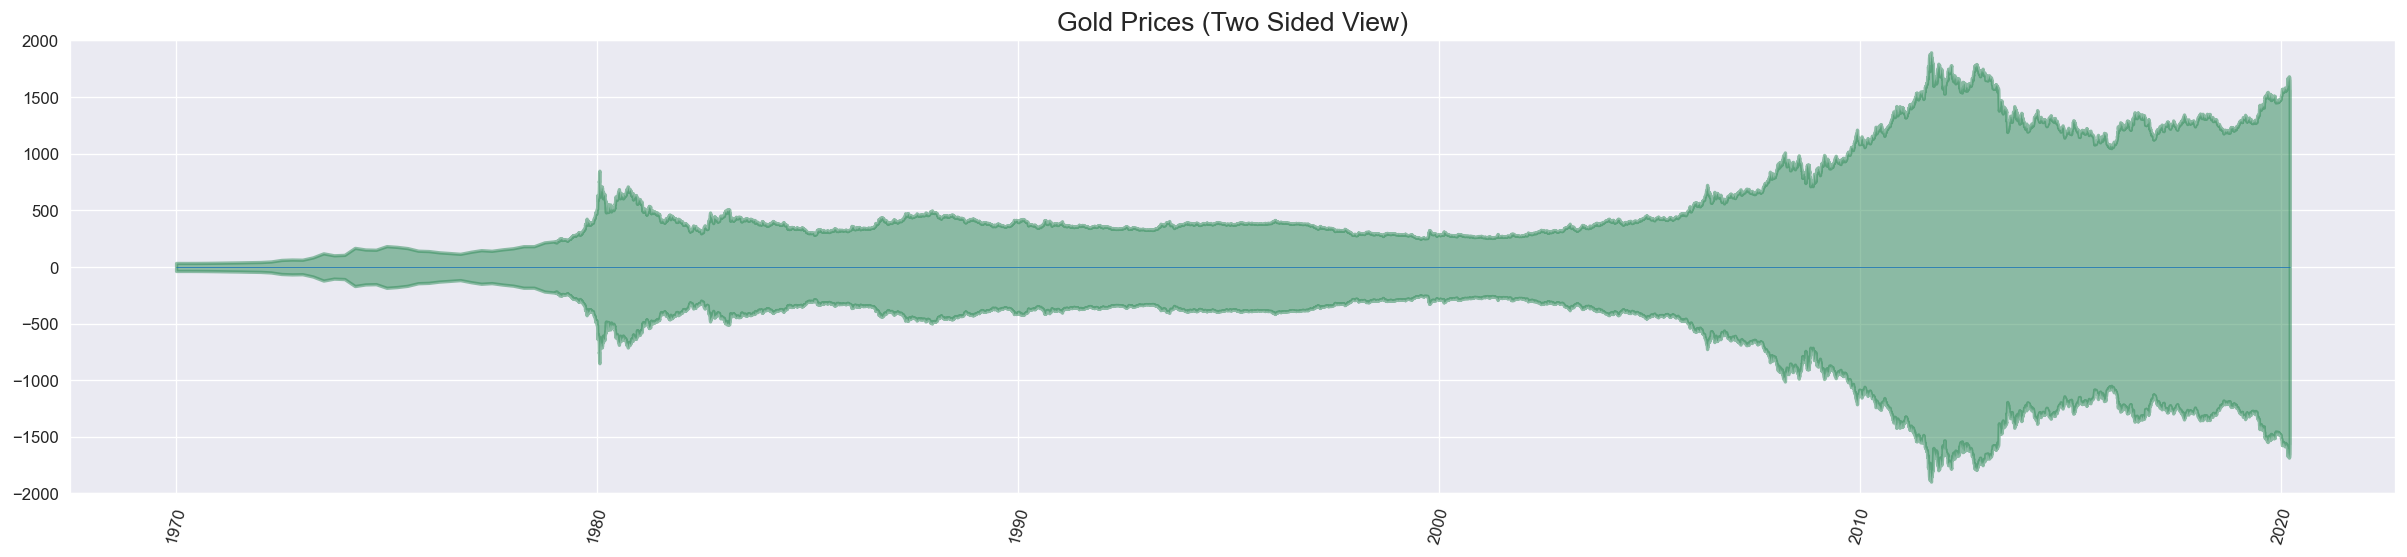

In [32]:
x=gold_df.index.values
y1=gold_df['Value'].values

#plot
fig, ax = plt.subplots(1,1, figsize=(25,5), dpi=120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-2000,2000)
plt.title('Gold Prices (Two Sided View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(gold_df.index), xmax=np.max(gold_df.index), linewidth=0.5)
plt.xticks(rotation = 75)
plt.show()

## 6. Patterns in a Time Series

Any time series visualization may consist of the following components: Base Level, Trend, Seasonality and Error.

Trend
- A trend is observed when there is an increasing or decreasing slope observed in the time series.

Seasonality
- A seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.

However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality and vice-versa.

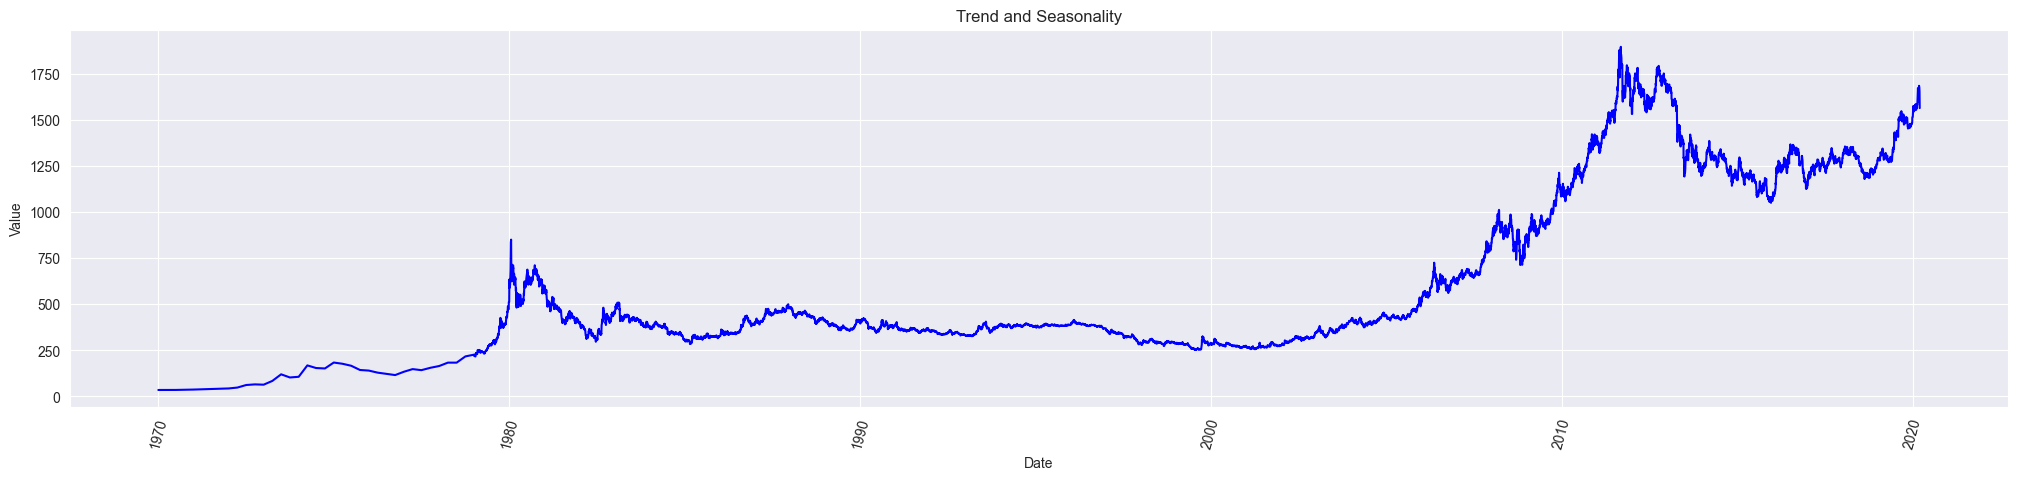

In [33]:
def plot_df(gold_df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(25,5), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation = 75)
    plt.show()
    

plot_df(gold_df, x=gold_df.index, y=gold_df['Value'], title='Trend and Seasonality')